In [1]:
#install package if not already installed
!pip install signed_backbones

In [2]:
import pandas as pd
import signed_backbones as sb

In [3]:
karate_net = pd.read_csv('karate.txt', header=None, sep='\t')

In [4]:
karate_sbb = sb.extract(karate_net, directed = False, significance_threshold = 2.576, vigor_threshold = (-0.1, 0.1))

Iterative fitting procedure converged at iteration 4.
39 edges are retained.


In [5]:
## visualize the original network and the signed backbone
import networkx as nx




In [6]:
original = nx.Graph()
for row in karate_net.values:
    original.add_edge(row[0], row[1], weight=row[2])
    

backbone = nx.Graph()
for row in karate_sbb:
    backbone.add_edge(row[0], row[1], weight=row[2])

## Visualization of the original network and the signed backbone

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]


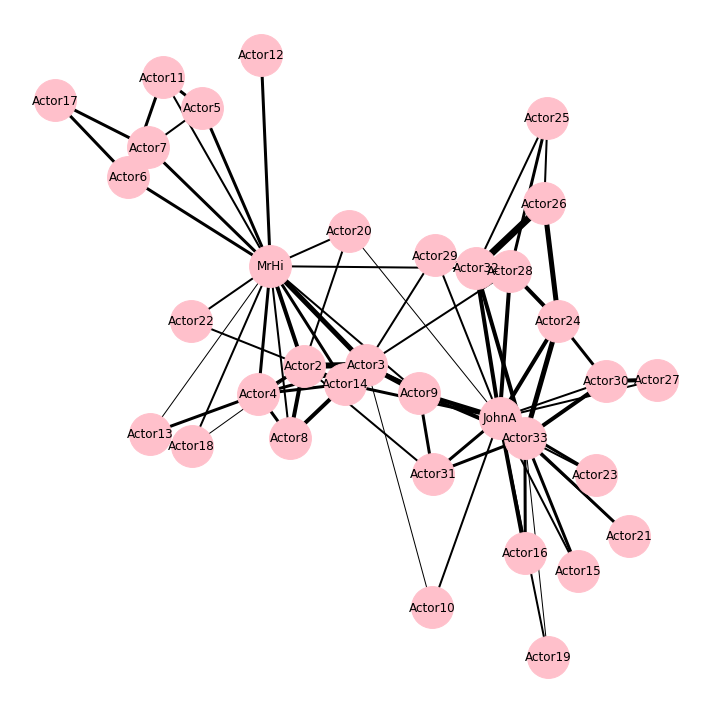

In [8]:
pos = nx.spring_layout(original, seed = 1)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(original, pos, node_color='pink', node_size=1750)

# edges
nx.draw_networkx_edges(original, pos, edgelist=original.edges(), width=[d["weight"] for (u, v, d) in original.edges(data=True)])
''
# labels
nx.draw_networkx_labels(original, pos, font_size=12, font_family="sans-serif", )

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

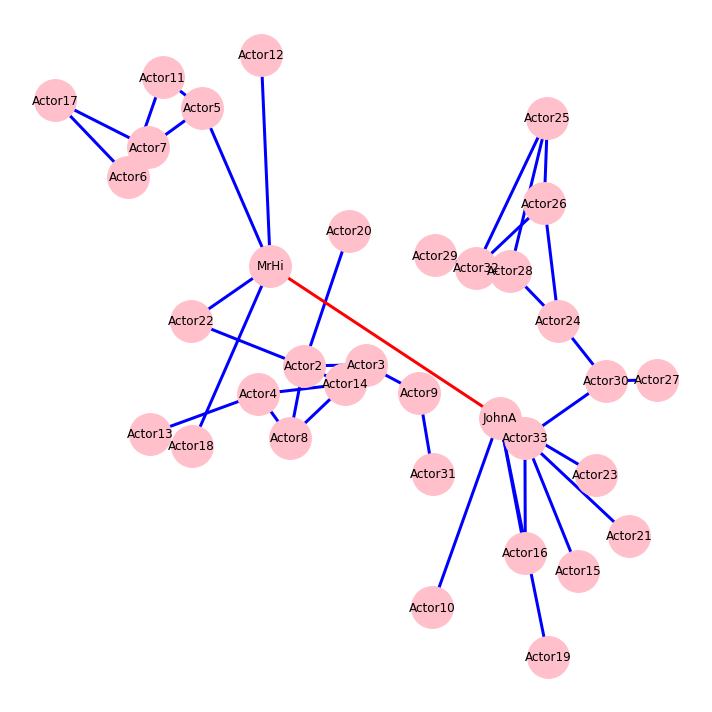

In [9]:
epos = [(u, v) for (u, v, d) in backbone.edges(data=True) if d["weight"] == 1]
eneg = [(u, v) for (u, v, d) in backbone.edges(data=True) if d["weight"] == -1]

nx.draw_networkx_nodes(original, pos, node_color='pink', node_size=1750)

# edges
nx.draw_networkx_edges(backbone, pos, edgelist=epos, width=3, edge_color="blue")
nx.draw_networkx_edges(backbone, pos, edgelist=eneg, width=3, edge_color="red")

# labels
nx.draw_networkx_labels(original, pos, font_size=12, font_family="sans-serif", )

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()